In [56]:
import pandas as pd
import numpy as np

In [57]:
dir = 'c:/_dados/_avito/'

In [28]:
train = pd.read_csv(dir + 'train.csv', encoding='utf-8', low_memory=False, parse_dates=["activation_date"])
train.drop(['image', 'image_top_1', 'item_seq_number'], axis=1, inplace=True)

In [37]:
train['deal_rounded'] = np.round(train['deal_probability']*10,0)/10
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,activation_date,user_type,deal_probability,deal_rounded
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2017-03-28,Private,0.12789,0.1
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,2017-03-26,Private,0.00000,0.0
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,2017-03-20,Private,0.43177,0.4
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,2017-03-25,Company,0.80323,0.8
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,2017-03-16,Private,0.20797,0.2


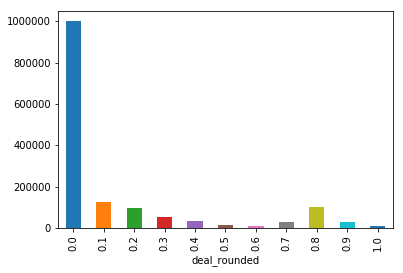

In [38]:
train.groupby('deal_rounded')['item_id'].count().plot(kind='bar')

In [96]:
naive_estimative = train.groupby(['category_name','user_type'])['deal_probability'].mean() #.unstack()
naive_estimative = naive_estimative.to_frame()
naive_estimative.to_csv(dir + 'naive.csv')

In [4]:
periods = pd.read_csv(dir + 'periods_train.csv', encoding='utf-8', low_memory=False, parse_dates=["activation_date","date_from","date_to"])
periods.head()

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28


In [5]:
submission = pd.read_csv(dir + 'sample_submission.csv', encoding='utf-8', low_memory=False)
submission.head()

,item_id,deal_probability
0,6544e41a8817,0.5
1,65b9484d670f,0.5
2,8bab230b2ecd,0.5
3,8e348601fefc,0.5
4,8bd2fe400b89,0.5


In [90]:
test = pd.read_csv(dir + 'test.csv', encoding='utf-8')

In [91]:
test.drop(['image', 'image_top_1', 'item_seq_number'], axis=1, inplace=True)
test.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,activation_date,user_type
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,2017-04-18,Private
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,2017-04-16,Private
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,2017-04-17,Private
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,2017-04-17,Private
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,2017-04-15,Private


In [93]:
test.drop(['user_id', 'region', 'city', 'parent_category_name', 'param_1','param_2',
           'param_3', 'description', 'price', 'activation_date', 'title'], axis=1, inplace=True)
test.head(20)


ValueError: labels ['user_id' 'region' 'city' 'parent_category_name' 'param_1' 'param_2'
 'param_3' 'description' 'price' 'activation_date' 'title'] not contained in axis

In [94]:
test.to_csv(dir + 'testing.csv')

In [8]:
display(train.shape)
display(periods.shape)
display(submission.shape)
display(test.shape)

(1503424, 18)

(16687412, 4)

(508438, 2)

(508438, 14)

In [9]:
train.price[train.price<50000].hist(by=(train.deal_probability>0.3), bins=30, figsize=(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026306DBCA90>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026306F64518>,
      dtype=object)

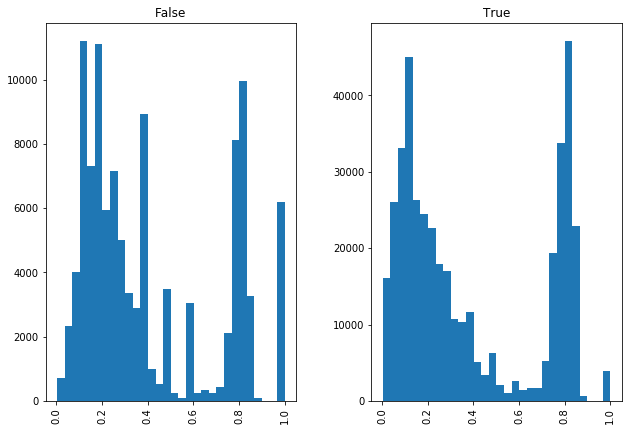

In [10]:
train.deal_probability[train.deal_probability>0.0].hist(by=(train.price>300),bins=30, figsize=(10,7))

In [11]:
train.groupby('parent_category_name')['deal_probability'].mean()

parent_category_name
Бытовая электроника    0.175421
Для бизнеса            0.111026
Для дома и дачи        0.179633
Животные               0.235957
Личные вещи            0.075876
Недвижимость           0.142051
Транспорт              0.263336
Услуги                 0.403123
Хобби и отдых          0.123703
Name: deal_probability, dtype: float64

In [12]:
periods.date_from = pd.to_datetime(periods.date_from)
periods.date_to = pd.to_datetime(periods.date_to)
periods.activation_date = pd.to_datetime(periods.activation_date)
periods.head()

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28


In [13]:
periods['time_diff'] = periods.date_to - periods.date_from
periods.head()

,item_id,activation_date,date_from,date_to,time_diff
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1 days
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3 days
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13 days
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9 days
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13 days


In [14]:
#pd.to_pickle(train, dir + 'train.pickle')
#pd.to_pickle(periods, dir + 'periods.pickle')
#pd.to_pickle(submission, dir + 'submission.pickle')
#pd.to_pickle(test, dir + 'test.pickle')